In [6]:
import sys; sys.path.insert(0, '../')
import geoplot as gplt
import geoplot.crs as ccrs
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
manhattan = gpd.read_file("../data/manhattan_mappluto/MNMapPLUTO.shp")

In [13]:
manhattan['YearBuilt'] = manhattan['YearBuilt'].replace(0, np.nan)
manhattan = manhattan[['geometry', 'YearBuilt']].dropna()

In [23]:
manhattan = manhattan.reset_index().rename(columns={'index': 'n'})

In [37]:
manhattan.geometry.head(6)

0    POLYGON ((973154.7117999941 194614.3315999955,...
1    POLYGON ((980492.3622000068 195423.9451999962,...
2    POLYGON ((979999.0820000023 196493.2800000012,...
3    POLYGON ((980424.4003999978 196274.334800005, ...
4    POLYGON ((979561.8711999953 191884.2495999932,...
5    (POLYGON ((972058.3400000036 190689.2802000046...
Name: geometry, dtype: object

0    POLYGON ((973154.7117999941 194614.3315999955,...
1    POLYGON ((980492.3622000068 195423.9451999962,...
2    POLYGON ((979999.0820000023 196493.2800000012,...
3    POLYGON ((980424.4003999978 196274.334800005, ...
4    POLYGON ((979561.8711999953 191884.2495999932,...
5    (POLYGON ((972058.3400000036 190689.2802000046...
Name: geometry, dtype: object


ValueError: Failed to determine the required bounds in projection coordinates. Check that the values provided are within the valid range (x_limits=[inf, inf], y_limits=[inf, inf]).

/Users/Honors/anaconda/envs/geoplot/lib/python3.5/site-packages/cartopy/mpl/feature_artist.py:133: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


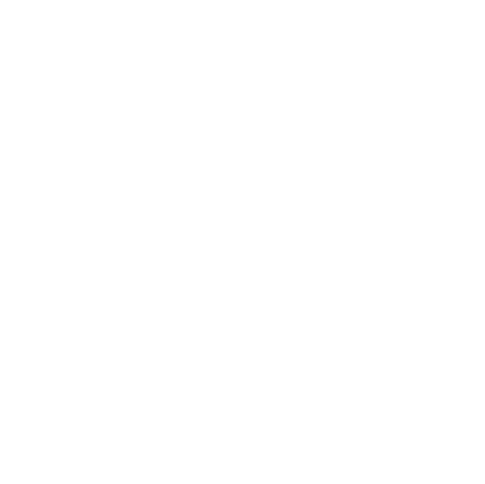

In [44]:
gplt.aggplot(manhattan.head(6), 
             projection=ccrs.AlbersEqualArea(), 
             geometry=manhattan.geometry.head(6), 
             by='n',
             hue='YearBuilt')

In [33]:
manhattan.geometry.head(5)

0    POLYGON ((973154.7117999941 194614.3315999955,...
1    POLYGON ((980492.3622000068 195423.9451999962,...
2    POLYGON ((979999.0820000023 196493.2800000012,...
3    POLYGON ((980424.4003999978 196274.334800005, ...
4    POLYGON ((979561.8711999953 191884.2495999932,...
Name: geometry, dtype: object